In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def mat(L):
    data = np.random.choice([-1, 1], size=(L, L)) # -1과 1 중에서 무작위로 LxL 개 뽑음
    return data

In [3]:
spins = mat(5)
spins

array([[-1,  1, -1, -1,  1],
       [ 1,  1, -1, -1, -1],
       [-1,  1, -1, -1,  1],
       [-1, -1,  1,  1,  1],
       [ 1,  1, -1,  1,  1]])

In [4]:
# 주기적 경계 조건을 처리하기 위한 이웃 함수 정의
def get_neighbors(i, j, L):
    return [
        ((i-1) % L, j),  # 위쪽
        ((i+1) % L, j),  # 아래쪽
        (i, (j-1) % L),  # 왼쪽
        (i, (j+1) % L)   # 오른쪽
    ]

In [5]:
def wolff_step(array, count, beta):
    L = len(array)
    p_add = 1 - np.exp(-2 * beta)  # P = 1 - exp(-2B)
    S_list = []  # <S>

    for _ in range(count):
        i, j = random.randint(0, L-1), random.randint(0, L-1) # 랜덤 스핀 좌표
        cluster_spin = array[i, j]
        stack = [(i, j)] # 스택과 클러스터에 각각 추가
        cluster = set([(i, j)])

        while stack:
            x, y = stack.pop() # LIFO
            for nx, ny in get_neighbors(x, y, L): # 해당 스핀의 이웃들 중
                if (nx, ny) not in cluster and array[nx, ny] == cluster_spin: # 아직 읽지 않은 스핀이고 해당 스핀과 같은 스핀이라면
                    if random.random() < p_add: # P의 확률로 스택과 클러스터에 추가
                        stack.append((nx, ny))
                        cluster.add((nx, ny))

        # Flip
        for x, y in cluster:
            array[x, y] = -array[x, y]

        # <S> 계산
        magnetization = np.sum(array) / (L * L)
        S_list.append(magnetization)

    return S_list

In [6]:
S_list01 = wolff_step(spins, 1000, 0.1)

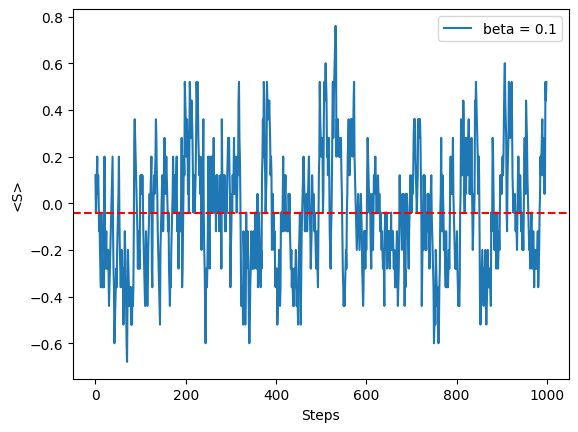

In [7]:
# Plot the results
plt.plot(S_list01, label='beta = 0.1')
plt.axhline(y=np.mean(S_list01), color='r', linestyle='--')
plt.xlabel('Steps')
plt.ylabel('<S>')
plt.legend()
plt.show()

[0.15561600000000003, 0.200496, 0.275328, 0.433992, 0.728904, 0.914792, 0.973096, 0.9902559999999999, 0.9961679999999998, 0.99828, 0.9993360000000001]


Text(0, 0.5, 'avg |<S>|')

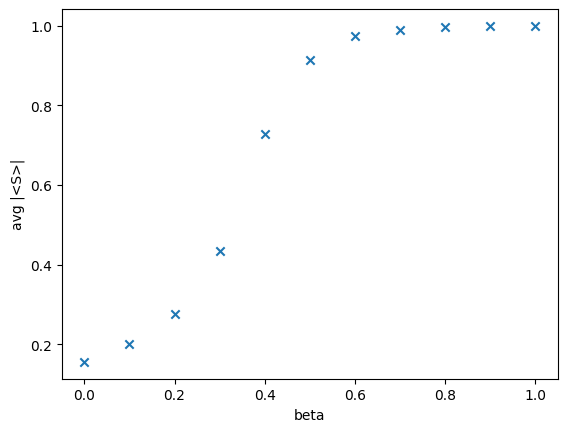

In [9]:
Betas = np.arange(0.0, 1.1, 0.1).tolist()
S_list1 = []

for beta in Betas:
    s = wolff_step(spins, 10000, beta)
    S_list1.append(np.mean(np.abs(s)))
print(S_list1)

plt.scatter(Betas, S_list1, marker='x')
plt.xlabel('beta')
plt.ylabel('avg |<S>|')